## Predict Batch Performance
### Grey Atom Hackthon 2 : Dec 17 to Jan 2nd
#### Version 1 - Collapsing/Merging Sensor data ,  Dec23

Here the attempt is to ;

1) combine the sensor data for each sensor, as there is high collinnearity between the readings for each sensor. By engineering the data into one or two columns we will be able to (a) reduce the number of features; and (b) remove multi-collinearity

2) having esablished the sensors that have colinear readings, drop 6 of the 7 readings

3) check for colinearity across sensors.

4) Retain only one sensor reading, from among the multiple sensors that are colinear.

5) Confirm visually.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
%matplotlib inline

In [13]:
# for Linear regression using scikit learn
import sklearn
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier ,RandomForestClassifier ,GradientBoostingClassifier
from xgboost import XGBClassifier 
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import Ridge,Lasso
from sklearn.metrics import roc_auc_score ,mean_squared_error,accuracy_score,classification_report,roc_curve,confusion_matrix
import warnings
warnings.filterwarnings('ignore')
from scipy.stats.mstats import winsorize
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
pd.set_option('display.max_columns',None)

In [3]:
# load the dataset ; 

#filename = 'C:/Users/379727/Documents/Datascience/GreyAtom/Datasets/train.csv'  # full path

pbp_org = pd.read_csv('../datasets/train.csv')

for each sensor
- extract the seven reading
- calculate the mean for reading 0-4, 
- determine the % deviation
- save in a df


In [5]:
%%time
sensor_stats = pbp_org.copy()    #make a copy of teh dataframe; create cols and add, also delete columns


for sensor in range(0,55) : # iterate for each sensor
    colname = []                               
    for reading in range (0,5):  # iterate for each reading
        colname = colname + ['x' + str(sensor) + '_t'+ str(reading)]
    
    sensor_stats ['x'+str(sensor)+'_m14']  =  sensor_stats[colname].mean(axis = 1) #calc mean of col 1-4
    
    sensor_stats.drop(sensor_stats[colname], axis = 1, inplace = True)

Wall time: 627 ms


In [6]:
sensor_stats

,Id,x0_t5,x0_t6,x1_t5,x1_t6,x2_t5,x2_t6,x3_t5,x3_t6,x4_t5,x4_t6,x5_t5,x5_t6,x6_t5,x6_t6,x7_t5,x7_t6,x8_t5,x8_t6,x9_t5,x9_t6,x10_t5,x10_t6,x11_t5,x11_t6,x12_t5,x12_t6,x13_t5,x13_t6,x14_t5,x14_t6,x15_t5,x15_t6,x16_t5,x16_t6,x17_t5,x17_t6,x18_t5,x18_t6,x19_t5,x19_t6,x20_t5,x20_t6,x21_t5,x21_t6,x22_t5,x22_t6,x23_t5,x23_t6,x24_t5,x24_t6,x25_t5,x25_t6,x26_t5,x26_t6,x27_t5,x27_t6,x28_t5,x28_t6,x29_t5,x29_t6,x30_t5,x30_t6,x32_t5,x32_t6,x31_t5,x31_t6,x34_t5,x34_t6,x33_t5,x33_t6,x36_t5,x36_t6,x35_t5,x35_t6,x37_t5,x37_t6,x38_t5,x38_t6,x39_t5,x39_t6,x40_t5,x40_t6,x41_t5,x41_t6,x42_t5,x42_t6,x43_t5,x43_t6,x44_t5,x44_t6,x45_t5,x45_t6,x46_t5,x46_t6,x47_t5,x47_t6,x48_t5,x48_t6,x49_t5,x49_t6,x50_t5,x50_t6,x51_t5,x51_t6,x52_t5,x52_t6,x53_t5,x53_t6,x54_t5,x54_t6,y2,x0_m14,x1_m14,x2_m14,x3_m14,x4_m14,x5_m14,x6_m14,x7_m14,x8_m14,x9_m14,x10_m14,x11_m14,x12_m14,x13_m14,x14_m14,x15_m14,x16_m14,x17_m14,x18_m14,x19_m14,x20_m14,x21_m14,x22_m14,x23_m14,x24_m14,x25_m14,x26_m14,x27_m14,x28_m14,x29_m14,x30_m14,x31_m14,x32_m14,x33_m14,x34_m14,x35_m14,x36_m14,x37_m14,x38_m14,x39_m14,x40_m14,x41_m14,x42_m14,x43_m14,x44_m14,x45_m14,x46_m14,x47_m14,x48_m14,x49_m14,x50_m14,x51_m14,x52_m14,x53_m14,x54_m14
0,706,769.815486,750.950000,0.902826,1.37600,1.0,1.0,20.868361,27.900000,6.7,6.9,752.713959,746.300000,788.799988,795.830000,810.299988,816.480000,4.4,4.4,0.257364,0.310000,82.008582,81.490000,26.686207,9.400000,469.211082,421.730000,439.673132,495.530000,0.897131,0.900000,1300.0,1704.25,65.0,55.66,701.260836,697.240000,80.0,80.0,80.0,80.0,1.0,1.0,27.000000,27.0,775.290000,775.29,0.590000,0.59,0.5,0.5,0.0,0.0,10.700000,10.7,800.330000,800.33,0.5,0.5,4144.350000,4144.35,553.190000,553.19,14.49,14.49,15.020000,15.02,36.22,36.22,36.140000,36.14,97.670000,97.67,97.350000,97.35,0.0,0.0,0.0,0.0,54.640000,54.64,89.920000,89.92,0.200000,0.2,1.0,1.0,0.5,0.5,0.5,0.5,0.0,0.0,89.770000,89.77,0.5,0.5,698.350000,698.35,140.750000,140.75,14.620000,14.62,866.570000,866.57,659.850000,659.85,87.200000,87.2,2.030000,2.03,0.72,760.188614,0.856411,1.0,21.125388,6.7,748.166374,788.799988,810.299988,4.4,0.263328,82.066558,18.290213,471.847415,454.243567,0.897174,1300.0,65.0,699.247257,80.0,80.0,1.0,27.003073,770.576778,0.632999,0.6,0.0,11.725320,831.384921,0.0,3767.603530,412.081595,14.841904,14.5,35.056015,34.460736,97.963919,98.000000,0.0,0.0,50.345578,84.493067,0.198344,1.0,1.0,0.0,0.0,84.291445,1.0,700.934490,110.384565,14.813661,883.464497,641.292488,90.690629,1.837369
1,239,766.110745,762.535189,1.410581,1.36387,1.0,1.0,26.987791,26.839536,6.5,6.5,756.834330,759.210858,845.599976,845.599976,840.799988,840.799988,4.5,4.5,0.360538,0.240273,81.681381,81.570994,52.559003,52.836098,479.697565,481.529527,427.324319,427.375337,0.900214,0.900315,1700.0,1700.00,57.0,57.00,701.123085,698.133028,80.0,80.0,80.0,80.0,1.0,1.0,29.000000,29.0,777.065247,775.29,0.454102,0.59,1.0,0.5,0.0,0.0,9.426670,10.7,818.943461,800.33,0.0,0.5,4245.357035,4144.35,354.077803,553.19,14.00,14.49,14.303400,15.02,39.00,36.22,39.814816,36.14,98.000000,97.67,97.944100,97.35,0.0,0.0,0.0,0.0,60.670654,54.64,81.522400,89.92,0.188051,0.2,1.0,1.0,1.0,0.5,0.0,0.5,0.0,0.0,83.394752,89.77,1.0,0.5,189.777699,698.35,145.443635,140.75,19.416194,14.62,885.922242,866.57,718.272482,659.85,72.613391,87.2,1.965790,2.03,0.62,754.583746,1.376503,1.0,26.888218,6.5,746.226744,845.599976,840.799988,4.5,0.271496,74.727859,55.228955,481.611994,427.435002,0.900308,1700.0,57.0,695.197789,80.0,80.0,1.0,29.000000,774.492577,0.481367,0.6,0.0,14.113401,825.301019,0.0,4041.275601,354.134635,17.738930,14.0,39.712148,39.000000,97.928204,98.000000,0.0,0.0,61.263152,84.839824,0.192508,1.0,1.0,0.0,0.0,83.974397,1.0,589.508842,127.708454,19.855527,890.842376,721.569024,72.095217,1.879331
2,613,758.380275,750.950000,0.595725,1.37600,1.0,1.0,22.125842,27.900000,6.9,6.9,935.122589,746.300000,792.700012,795.830000,815.299988,816.480000,4.4,4.4,0.216435,0.310000,83.360734,81.490000,4.835260,9.400000,411.951681,421.730000,428.521940,495.530000,0.901649,0.900

from the summary for each sensor, determine, if all columns have to be retained or one of the six column has to be retained.
determine the list of such columns and create a new data frame.


How to use the reading spread data:

Identify the sensors wheere the reading are spread apart. 
The intitution is that if the reading are very close, then they may be co-linear, and only one reading should be considered

WATCHOUT :
however it may so happens that for few batches the sensor reading are very close, and for few others the sensor readings may be widely seperated. IN this case all columns should be considered for that sensor.

A similar spread metric calculated for each column can indicate if the readings across batches are consistent of if there are varations



ANALYSIS: 
The above df 'sensor_spread_all' show the spread among the 't0' to 't6' readings for each sensor.
The ASSUMPTION is that for a normal process, the reading should not vary by much, and hence the spread (here std-dev / mean) should not be wide. 

For almost 20 sensors, this variation is under 5%, and for the others it is much higher.

Possible INTUTION is :
- The sensors where the reading is in the narrow range, the readings columns would be collinear, and hence ONLY one of the readings column should be used. Question is which one?
- The sendors where the the reading is in a wide range, there is little co-realation among the readings, and hence all the columns can be used.

Observations on  the sensor readings spread table

- 1,3,9, 11, 15, 19, 24, 26, 28, 29, 30  : Have high spreads
- 25 : blanks
- 28 : variation of 175% +
- 37, 38 : high variation of 250% + AND many BLANKS 
- 2, 8 :  all zero



In [7]:
# Write this to a csv file.
filenum = '-mean1-4-01'       # Change this to avoid having to delete the existing csv file.
filename = 'train_reduced-'+str(sensor_stats.shape[1])+'-col-'+filenum+'.csv'
sensor_stats.to_csv(filename)

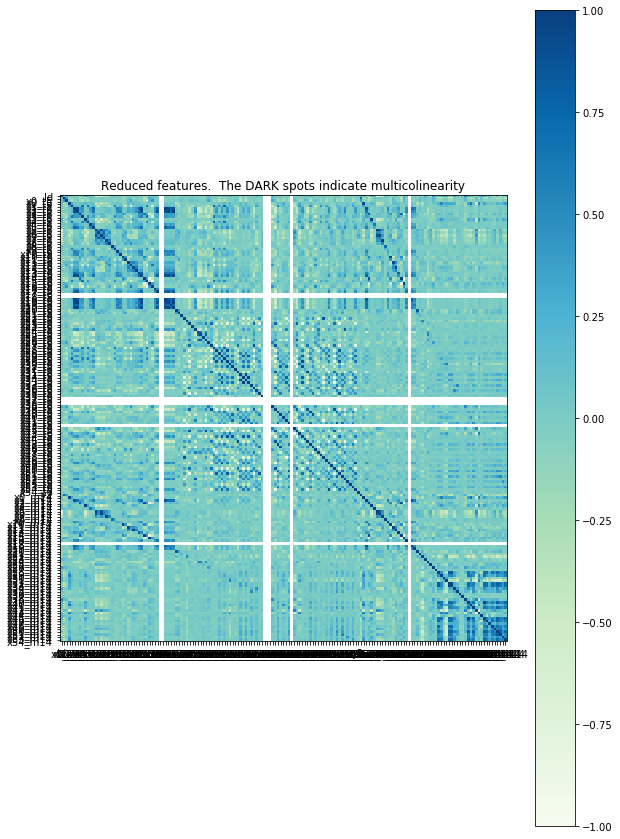

In [9]:
plt.figure(figsize =(10,15))
plt.imshow(sensor_stats.corr(), cmap=plt.cm.GnBu, interpolation='nearest',data=True)
plt.colorbar()
tick_marks = [i for i in range(len(sensor_stats.columns))]
plt.xticks(tick_marks, sensor_stats.columns, rotation=0)
plt.yticks(tick_marks, sensor_stats.columns, rotation=0)
plt.title('Reduced features.  The DARK spots indicate multicolinearity')
plt.show()

In [13]:
sensor_stats.head()

,Id,x0_t5,x0_t6,x1_t5,x1_t6,x2_t5,x2_t6,x3_t5,x3_t6,x4_t5,...,x45_m14,x46_m14,x47_m14,x48_m14,x49_m14,x50_m14,x51_m14,x52_m14,x53_m14,x54_m14
0,706,769.815486,750.950000,0.902826,1.37600,1.0,1.0,20.868361,27.900000,6.7,...,0.0,84.291445,1.0,700.934490,110.384565,14.813661,883.464497,641.292488,90.690629,1.837369
1,239,766.110745,762.535189,1.410581,1.36387,1.0,1.0,26.987791,26.839536,6.5,...,0.0,83.974397,1.0,589.508842,127.708454,19.855527,890.842376,721.569024,72.095217,1.879331
2,613,758.380275,750.950000,0.595725,1.37600,1.0,1.0,22.125842,27.900000,6.9,...,0.2,92.301504,0.6,486.755184,97.245755,13.667415,860.041092,683.158002,88.263346,2.062123
3,588,770.447814,750.950000,0.713621,1.37600,1.0,1.0,28.510415,27.900000,6.9,...,0.0,89.855443,1.0,602.887061,135.643379,15.009650,873.941342,651.157343,88.760721,1.904318
4,780,772.908223,750.950000,0.853173,1.37600,1.0,1.0,9.598223,27.900000,6.8,...,0.2,88.001517,0.8,417.757490,71.876995,13.835245,851.460292,632.687423,86.979840,2.336127


### Dropping ID column

In [10]:
pbp_reduced = sensor_stats.drop(columns = ['Id'], axis =1) 
pbp_reduced.shape

(794, 166)

### Normalizing the sensor readings

In [14]:
# normalise all the down selected sensor readings ; does not include Id 
org_col_names = pbp_reduced.columns
ss_obj  = sklearn.preprocessing.StandardScaler()
pbp_std = pd.DataFrame(ss_obj.fit_transform(pbp_reduced))
pbp_std.columns = org_col_names

In [15]:
pbp_std.head()

,x0_t5,x0_t6,x1_t5,x1_t6,x2_t5,x2_t6,x3_t5,x3_t6,x4_t5,x4_t6,x5_t5,x5_t6,x6_t5,x6_t6,x7_t5,x7_t6,x8_t5,x8_t6,x9_t5,x9_t6,x10_t5,x10_t6,x11_t5,x11_t6,x12_t5,x12_t6,x13_t5,x13_t6,x14_t5,x14_t6,x15_t5,x15_t6,x16_t5,x16_t6,x17_t5,x17_t6,x18_t5,x18_t6,x19_t5,x19_t6,x20_t5,x20_t6,x21_t5,x21_t6,x22_t5,x22_t6,x23_t5,x23_t6,x24_t5,x24_t6,x25_t5,x25_t6,x26_t5,x26_t6,x27_t5,x27_t6,x28_t5,x28_t6,x29_t5,x29_t6,x30_t5,x30_t6,x32_t5,x32_t6,x31_t5,x31_t6,x34_t5,x34_t6,x33_t5,x33_t6,x36_t5,x36_t6,x35_t5,x35_t6,x37_t5,x37_t6,x38_t5,x38_t6,x39_t5,x39_t6,x40_t5,x40_t6,x41_t5,x41_t6,x42_t5,x42_t6,x43_t5,x43_t6,x44_t5,x44_t6,x45_t5,x45_t6,x46_t5,x46_t6,x47_t5,x47_t6,x48_t5,x48_t6,x49_t5,x49_t6,x50_t5,x50_t6,x51_t5,x51_t6,x52_t5,x52_t6,x53_t5,x53_t6,x54_t5,x54_t6,y2,x0_m14,x1_m14,x2_m14,x3_m14,x4_m14,x5_m14,x6_m14,x7_m14,x8_m14,x9_m14,x10_m14,x11_m14,x12_m14,x13_m14,x14_m14,x15_m14,x16_m14,x17_m14,x18_m14,x19_m14,x20_m14,x21_m14,x22_m14,x23_m14,x24_m14,x25_m14,x26_m14,x27_m14,x28_m14,x29_m14,x30_m14,x31_m14,x32_m14,x33_m14,x34_m14,x35_m14,x36_m14,x37_m14,x38_m14,x39_m14,x40_m14,x41_m14,x42_m14,x43_m14,x44_m14,x45_m14,x46_m14,x47_m14,x48_m14,x49_m14,x50_m14,x51_m14,x52_m14,x53_m14,x54_m14
0,1.138882,-0.164363,0.071182,0.531048,0.079606,0.071157,-0.500595,0.438851,0.086676,0.488360,0.333322,0.106005,-0.701056,-0.226263,-0.036083,0.096445,-0.446245,-0.209310,0.438332,0.441145,0.152027,0.129373,-0.253516,-0.345733,-0.304636,-0.477791,-0.877498,0.031170,0.088829,0.169239,-0.865298,0.446277,0.793195,-0.429999,0.450194,0.044131,0.0,0.0,0.090846,0.072336,0.075497,0.071157,-0.455547,-0.187090,0.054767,0.029836,0.015835,-0.054821,-0.201779,-0.015873,-0.050252,-0.035511,-0.163272,-0.037257,-0.349508,-0.07297,0.679918,0.079606,0.268305,0.050941,0.488240,0.070053,-0.02485,0.028686,-0.264444,-0.040298,0.011492,0.011925,0.002141,0.016956,0.105992,-0.079606,0.214001,0.034168,-0.112938,0.0,0.0,0.0,-0.332990,-0.060032,0.260987,0.017021,-0.128285,-0.021268,0.118527,0.0,-0.114077,-0.047667,0.123155,0.047667,-0.164824,-0.035511,0.244428,0.030801,-0.486960,-0.047667,0.368589,0.035842,0.277118,0.04257,-0.067884,-0.046017,0.135342,0.064451,-0.018269,0.010862,0.048085,-0.024418,0.138187,0.041773,1.037478,0.463531,-0.060084,0.069868,-0.710150,0.088993,0.216022,-0.701056,-0.036083,-0.457145,0.620448,0.144000,-0.529710,-0.276687,-0.675527,0.108671,-0.862885,0.792754,0.473107,0.0,0.093363,0.03457,-0.517028,0.043794,0.317783,-0.191804,-0.061585,-0.160255,0.539981,-0.184482,0.341149,-0.161092,-0.710644,-0.156497,-0.069641,-0.270768,0.468310,0.272483,-0.478620,-0.311571,-0.763233,-0.095595,-0.288352,0.242498,0.861152,-0.824612,-0.620183,-0.114714,0.604706,1.292884,-0.111262,-0.041795,0.465283,-0.299555,0.447894,-0.261283
1,0.862745,1.416486,1.491593,0.490227,0.079606,0.071157,0.879573,0.207823,-1.243214,-2.632425,0.449867,0.643877,1.401421,2.785581,0.964395,1.460938,0.543472,1.329508,1.602294,-0.629337,0.123276,0.136861,0.628336,1.836635,-0.071680,1.017494,-1.114233,-2.155142,0.127003,0.173849,1.126820,0.418117,-0.774926,-0.066683,0.436153,0.244357,0.0,0.0,0.090846,0.072336,0.075497,0.071157,0.683328,2.091306,0.119908,0.029836,-1.261413,-0.054821,1.598360,-0.015873,-0.050252,-0.035511,-0.779860,-0.037257,0.675439,-0.07297,-1.453897,0.079606,0.444579,0.050941,-1.937212,0.070053,-1.16902,0.028686,-0.531717,-0.040298,1.175376,0.011925,1.487226,0.016956,0.180728,-0.079606,0.256342,0.034168,-0.112938,0.0,0.0,0.0,0.033435,-0.060032,-1.528467,0.017021,-1.298220,-0.021268,0.118527,0.0,1.661943,-0.047667,-1.654752,0.047667,-0.164824,-0.035511,-1.125284,0.030801,1.475712,-0.047667,-2.693960,0.035842,0.444959,0.04257,1.663680,-0.046017,0.543856,0.064451,1.704176,0.010862,-1.631847,-0.024418,-0.209212,0.041773,0.494747,-0.005724,1.439388,0.069868,1.044182,-1.241735,0.153763,1.401421,0.964395,0.550554,0.733321,-1.670762,0.725817,-0.040541,-1.233858,0.164868,1.130744,-0.780076,-0.566004,0.0,0.093363,0.03457,0.696432,0.187432,-0.575862,-0.191804,-0.061585,1.087348,0.303361,-0.184482,0.689187,-0.

### Train Test Split

In [19]:
# Predictors
X = pbp_std.drop('y2', axis=1)

# Target
y = pbp_std['y2']

# Dividing the data into train and test subsets
x_train,x_val,y_train,y_val = train_test_split(X,y,test_size=0.2,random_state=42)

### Feature Selection - Using RFE

In [25]:
# Selecting 8 number of features
# XGBoost classifier model
models = XGBClassifier()
#   using  rfe and selecting 8 features
rfe = RFE(models,8)
#   fitting the model
rfe = rfe.fit(X,y)
#   ranking features
feature_ranking = pd.Series(rfe.ranking_, index=X.columns)
plt.show()
print('Features  to be selected for XGBoost classifier are:')
print(feature_ranking[feature_ranking.values==1].index.tolist())
print('===='*30)

KeyboardInterrupt: 